In [59]:
!pip install elasticsearch

In [2]:
#index data in elasticsearch
from elasticsearch import Elasticsearch
import getpass

es_cloud_id = getpass.getpass('Enter Elastic Cloud ID:  ')
es_user = getpass.getpass('Enter cluster username:  ')
es_pass = getpass.getpass('Enter cluster password:  ')



In [60]:

es = Elasticsearch(cloud_id=es_cloud_id,
                   basic_auth=(es_user, es_pass)
                   )
es.info() # should return cluster info

ObjectApiResponse({'name': 'instance-0000000007', 'cluster_name': 'df2380a9e6b0425f9d4bc01639e59cf5', 'cluster_uuid': 'FvCTlZHYQqasErU8cbn4_A', 'version': {'number': '8.8.1', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': 'f8edfccba429b6477927a7c1ce1bc6729521305e', 'build_date': '2023-06-05T21:32:25.188464208Z', 'build_snapshot': False, 'lucene_version': '9.6.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})

## create index

In [61]:
index_name = "my-image-index"


In [62]:
from elasticsearch import Elasticsearch


# Specify index configuration
index_config = {
  "settings": {
    "index.refresh_interval": "5s",
    "number_of_shards": 1
  },
  "mappings": {
    "properties": {
      "image_embedding": {
        "type": "dense_vector",
        "dims": 512,
        "index": True,
        "similarity": "cosine"
      },
      "image_id": {
        "type": "keyword"
      },
      "image_name": {
        "type" : "keyword"
      },
      "relative_path" : {
        "type" : "keyword"
      },
      "exif" : {
        "properties" : {
          "location": {
            "type": "geo_point"
          },
          "date": {
            "type": "date"
          }
        }
      }
    }
  }
}

# Create index
if not es.indices.exists(index=index_name):
    index_creation = es.indices.create(index=index_name, ignore=400, body=index_config)
    print("index created: ", index_creation)
else:
    print("Index  already exists.")


Index  already exists.


In [63]:
import os

def list_image_files(directory):
    # The list to store the names of .wav files
    image_files = []

    # Check if the path exists
    if os.path.exists(directory):
        # Walk the directory
        for root, dirs, files in os.walk(directory):
            for file in files:
                # Check if the file is a .wav file
                if file.endswith('.png'):
                    # Extract the filename from the path
                    filename = os.path.splitext(file)[0]
                    print(filename)

                    # Add the file to the list
                    image_files.append(file)
    else:
        print(f"The directory '{directory}' does not exist.")

    # Return the list of image files
    return image_files

# Use the function
image_path = "/content/drive/MyDrive/@DailyBytes/images/"
image_files = list_image_files(image_path)


104935_2
48181_2
103081_2
44959_2


In [64]:
# generate embedding
def image_embedding(image, model):
    return model.encode(image)


In [65]:
pip -q install Pillow sentence_transformers

In [66]:
from PIL import Image
from sentence_transformers import SentenceTransformer

from datetime import datetime


In [67]:
img_model = SentenceTransformer('clip-ViT-B-32')
lst = []


In [68]:

filename = "/content/drive/MyDrive/@DailyBytes/images/103081_2.png"
image = Image.open(filename)

doc = {}
embedding = image_embedding(image, img_model)
doc['image_id'] = "alex01"
doc['image_name'] = "Alex Salgado"
doc['image_embedding'] = embedding.tolist()
doc['relative_path'] = filename
doc['exif'] = {}
lst.append(doc)


In [69]:

filename = "/content/drive/MyDrive/@DailyBytes/images/104935_2.png"
image = Image.open(filename)
doc = {}
embedding = image_embedding(image, img_model)
doc['image_id'] = "carly01"
doc['image_name'] = "Carly Richmond"
doc['image_embedding'] = embedding.tolist()
doc['relative_path'] = filename
doc['exif'] = {}
lst.append(doc)


In [70]:
filename = "/content/drive/MyDrive/@DailyBytes/images/44959_2.png"
image = Image.open(filename)
doc = {}
embedding = image_embedding(image, img_model)
doc['image_id'] = "david01"
doc['image_name'] = "David Pilato"
doc['image_embedding'] = embedding.tolist()
doc['relative_path'] = filename
doc['exif'] = {}
lst.append(doc)


In [71]:
filename = "/content/drive/MyDrive/@DailyBytes/images/48181_2.png"
image = Image.open(filename)
doc = {}
embedding = image_embedding(image, img_model)
doc['image_id'] = "philipp01"
doc['image_name'] = "Philipp Krenn"
doc['image_embedding'] = embedding.tolist()
doc['relative_path'] = filename
doc['exif'] = {}
lst.append(doc)


In [72]:
from datetime import datetime

#Storing Songs in Elasticsearch with Vector Embeddings:
def store_in_elasticsearch(doc):
  body = {
      'image_id' : doc['image_id'] ,
      'image_name': doc['image_name'],
      'timestamp': datetime.now(),
      'image_embedding' : doc['image_embedding'],
      'relative_path': doc['relative_path'],
      'exif': doc['exif']
      }

  es.index(index=index_name, document=body)
  print ("stored...", doc)



In [35]:
# execute the insertion
for doc in lst:
  store_in_elasticsearch(doc)


stored... {'image_id': 'alex01', 'image_name': 'Alex Salgado', 'image_embedding': [0.4802376329898834, 0.03847512602806091, 0.28885048627853394, 0.23852665722370148, 0.36021554470062256, -0.24046337604522705, -0.18388405442237854, 0.5131625533103943, 0.949065089225769, 0.3092963397502899, 0.46583127975463867, -0.4561592936515808, 0.12423855811357498, -0.2101004272699356, -0.402412474155426, -0.3273071050643921, 2.2480781078338623, 0.4976177215576172, -0.07881814986467361, -0.2631588578224182, 0.49610018730163574, -0.056350111961364746, 0.5548425912857056, -0.3026271462440491, 0.36799633502960205, 0.47561153769493103, -0.3593255579471588, 0.22349393367767334, -0.09017935395240784, -0.11062299460172653, -0.12578970193862915, -0.15354833006858826, -0.35459184646606445, 0.22723384201526642, 0.007647678256034851, 0.1609642654657364, -0.17264041304588318, -0.09012264013290405, -0.4527968466281891, 0.25785762071609497, -0.39667463302612305, 0.1305035948753357, 0.07073643058538437, -0.41900262

## phase 02: Vector Search

In [73]:
# Define a function to query image vector in Elasticsearch
def query_image_vector(es, emb, field_key, index_name):
    query = {
        "bool": {
            "filter": [{
                "exists": {
                    "field": field_key
                }
            }]
        }
    }

    knn = {
        "field": field_key,
        "k": 2,
        "num_candidates": 100,
        "query_vector": emb,
        "boost": 100
    }

    # The fields to retrieve from the matching documents
    fields = ["image_id", "image_name", "relative_path", "image_embedding"]

    # The name of the index to search
    index = index_name

    resp = es.search(index=index,
                     query=query,
                     knn=knn,
                     fields=fields,
                     size=1,
                     source=False)

    # Return the search results
    return resp


In [74]:
from IPython.display import display
from IPython.display import Image as ShowImage


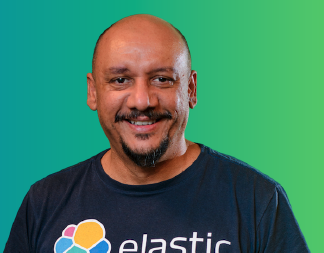

In [75]:
filename = "/content/drive/MyDrive/@DailyBytes/search_images/alexkey1.png"

display(ShowImage(filename=filename))

In [76]:
image = Image.open(filename)

# Generate the embedding vector from the provided image file
embedding = image_embedding(image, img_model)

# Query the Elasticsearch instance
resp = query_image_vector (es, embedding.tolist(), "image_embedding","my-image-index")


In [89]:
# resp

In [21]:
# resp['hits']['hits'][0]['fields']

In [77]:
filename = resp['hits']['hits'][0]['fields']['relative_path'][0]

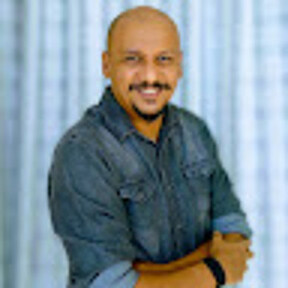

In [78]:

display(ShowImage(filename=filename))


## Second example David

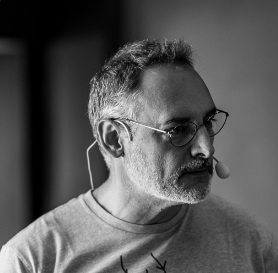

In [79]:
filename = "/content/drive/MyDrive/@DailyBytes/search_images/davidkey1.png"

display(ShowImage(filename=filename))

In [80]:
image = Image.open(filename)

# Generate the embedding vector from the provided image file
embedding = image_embedding(image, img_model)

# Query the Elasticsearch instance
resp = query_image_vector (es, embedding.tolist(), "image_embedding","my-image-index")

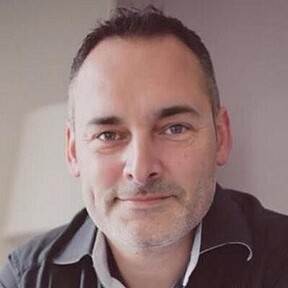

In [81]:
filename = resp['hits']['hits'][0]['fields']['relative_path'][0]
display(ShowImage(filename=filename))


# Visualization

In [82]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import plotly.express as px
import pandas as pd

def visualize_embeddings(embeddings, labels):
    # Create a PCA object
    pca = PCA(n_components=2)  # We reduce to 2 dimensions

    print("1*")
    # We normalize the features
    normalized_embeddings = preprocessing.StandardScaler().fit_transform(embeddings)

    print("2*")
    # Apply PCA
    principal_components = pca.fit_transform(normalized_embeddings)

    print("2*")
    # Create a dataframe for the PCA results
    pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

    # Add the labels to the dataframe
    pca_df['Label'] = labels

    # Create a scatter plot
    fig = px.scatter(pca_df, x="PC1", y="PC2", color="Label")
    fig.update_layout(title='Image Embeddings')


    # Show the plot
    fig.show()


In [83]:
NUM_MUSIC = 4  # example value
song_emb_lst = []
song_lst = []

# execute the insertion
for doc in lst:
  song_emb_lst.append(doc['image_embedding'])
  song_lst.append(doc['image_name'])

filename = "/content/drive/MyDrive/@DailyBytes/search_images/alexkey1.png"
image = Image.open(filename)

# Generate the embedding vector from the provided image file
embedding = image_embedding(image, img_model)
song_emb_lst.append(embedding)
song_lst.append("alex_key1")

filename = "/content/drive/MyDrive/@DailyBytes/search_images/davidkey1.png"
image = Image.open(filename)

# Generate the embedding vector from the provided image file
embedding = image_embedding(image, img_model)
song_emb_lst.append(embedding)
song_lst.append("davi_key1")

In [84]:
visualize_embeddings(song_emb_lst, song_lst)

1*
2*
2*
